In [2]:
import numpy as np

# Задание 1. Генератор случайных матриц.

In [3]:
def matrix_generate(rows, columns, type_ = "full", eps = 0, rank = None):
    """
    matrix_generate(rows, columns, type_ = "full", eps = 0, rank = None)

    Создаёт случайную матрицу выбранного типа.

    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".

    Parameters
    ----------
    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "upper_triangular", "lower_triangular",
        "symmetric", "diagonal", "degenerate", "rank_deficient", "perturbation".
    eps: float, optional
        Дополнительное число, использующееся при генерации для некоторых типов матриц.
    rank: int, optional
        Для матрицы с пониженным рангом, указывает требуемый ранг.

    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.

    Notes
    -----
    Поддерживаемые типы матриц:
        "full", "upper_triangular", "lower_triangular", "symmetric", 
        "diagonal", "degenerate", "rank_deficient", "perturbation".

    """

    A = None

    if type_ == "full":
        A = np.random.random(size=(rows, columns))

    elif type_ == "upper_triangular":
        A = np.random.random(size=(rows, columns))
        for i in range(rows):
            for j in range(columns):
                if i > j:
                    A[i, j] = 0

    elif type_ == "lower_triangular":
        A = np.random.random(size=(rows, columns))
        for i in range(rows):
            for j in range(columns):
                if i < j:
                    A[i, j] = 0

    elif type_ == "symmetric":
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"
        else:
            A = np.random.random(size=(rows, columns))
            for i in range(rows):
                for j in range(columns):
                    if (i > j):
                        A[i, j] = A[j, i]

    elif type_ == "diagonal":
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"
        A = np.zeros((rows, columns))
        for i in range(rows):
            A[i, i] = np.random.random()

    elif type_ == "degenerate":
        A = np.zeros((rows, columns))

    elif type_ == "rank_deficient":
        A = np.zeros((rows, columns))
        if rank is None or rank > min(rows, columns):
            return f"Error with rank specification for type {type_} and shape ({rows},{columns})"
        for i in range(rank):
            A[i, i] = np.random.random()
        for i in range(rows):
            for j in range(columns):
                if i != j:
                    A[i, j] = np.random.random()

    elif type_ == "perturbation":
        A = np.zeros((rows, columns))
        for i in range(rows):
            for j in range(columns):
                A[i, j] = np.random.random()
                perturbation = np.random.uniform(-eps, eps)
                A[i, j] += perturbation

    else:
        return f"Unknown matrix type: {type_}"

    return A

print("Diagonal Matrix:\n", matrix_generate(3, 3, type_="diagonal"))
print("Upper Triangular Matrix:\n", matrix_generate(4, 4, type_="upper_triangular"))
print("Rank Deficient Matrix (rank 2):\n", matrix_generate(4, 4, type_="rank_deficient", rank=2))
print("Perturbed Matrix (eps=0.1):\n", matrix_generate(3, 3, type_="perturbation", eps=0.1))


Diagonal Matrix:
 [[0.22412797 0.         0.        ]
 [0.         0.18269239 0.        ]
 [0.         0.         0.78960397]]
Upper Triangular Matrix:
 [[0.08099624 0.06078936 0.48300062 0.58562457]
 [0.         0.7231909  0.19218542 0.14236677]
 [0.         0.         0.72753039 0.39818315]
 [0.         0.         0.         0.35936594]]
Rank Deficient Matrix (rank 2):
 [[0.52392617 0.17422804 0.78464556 0.26804991]
 [0.29867832 0.16769783 0.37728738 0.514742  ]
 [0.18497967 0.66704243 0.         0.23069442]
 [0.44205646 0.04247436 0.36756649 0.        ]]
Perturbed Matrix (eps=0.1):
 [[0.0969502  0.05446286 0.79276442]
 [0.74997388 0.39455713 0.11293904]
 [0.05809251 0.48721343 0.50008002]]


# Задание 2. Вычисление матричных норм и числа обусловленности

In [13]:
from scipy.linalg import eigvals

def vector_norm(v, norm_type='L2'):
    """
    Вычисляет L1, L2 или максимальную норму вектора.

    Parameters:
    ----------
    v : ndarray
        Вектор для которого вычисляется норма.
    norm_type : str
        Тип нормы: 'L1', 'L2', 'max'.

    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".
    
    Returns:
    -------
    norm_value : float
        Значение нормы.
    """
    if norm_type == 'L1':
        return np.sum(np.abs(v))
    elif norm_type == 'L2':
        return np.sqrt(np.sum(v ** 2))
    elif norm_type == 'max':
        return np.max(np.abs(v))
    else:
        raise ValueError(f"Unknown norm type: {norm_type}")

def matrix_norm(A, norm_type='L2'):
    """
    Вычисляет матричные нормы, подчиненные нормам векторов L1, L2 и max.

    Parameters:
    ----------
    A : ndarray
        Матрица для которой вычисляется норма.
    norm_type : str
        Тип нормы: 'L1', 'L2', 'max'.
    
    Returns:
    -------
    norm_value : float
        Значение нормы.
    """
    if norm_type == 'L1':
        return np.max(np.sum(np.abs(A), axis=0))
    
    elif norm_type == 'L2':
        eigenvalues = eigvals(np.dot(A.T, A))
        return np.sqrt(np.max(eigenvalues.real))
    
    elif norm_type == 'max':
        return np.max(np.sum(np.abs(A), axis=1))
    
    else:
        raise ValueError(f"Unknown norm type: {norm_type}")

def condition_number(A, norm_type='L2'):
    """
    Вычисляет число обусловленности матрицы в выбранной норме.

    Parameters:
    ----------
    A : ndarray
        Матрица для которой вычисляется число обусловленности.
    norm_type : str
        Тип нормы: 'L1', 'L2', 'max'.
    
    Returns:
    -------
    cond_number : float
        Число обусловленности матрицы.
    """
    norm_A = matrix_norm(A, norm_type)
    norm_inv_A = matrix_norm(np.linalg.inv(A), norm_type)
    
    return norm_A * norm_inv_A

v = np.array([1, -2, 3])
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])

print("L1 норма вектора:", vector_norm(v, 'L1'))
print("L2 норма вектора:", vector_norm(v, 'L2'))
print("max норма вектора:", vector_norm(v, 'max'))

print("L1 норма матрицы:", matrix_norm(A, 'L1'))
print("L2 норма матрицы:", matrix_norm(A, 'L2'))
print("max норма матрицы:", matrix_norm(A, 'max'))

print("Число обусловленности матрицы (L2):", condition_number(A, 'L2'))

L1 норма вектора: 6
L2 норма вектора: 3.7416573867739413
max норма вектора: 3
L1 норма матрицы: 19
L2 норма матрицы: 17.412505166808597
max норма матрицы: 25
Число обусловленности матрицы (L2): 88.44827992069867


# Задание 3. Эквивалентность первых двух норм

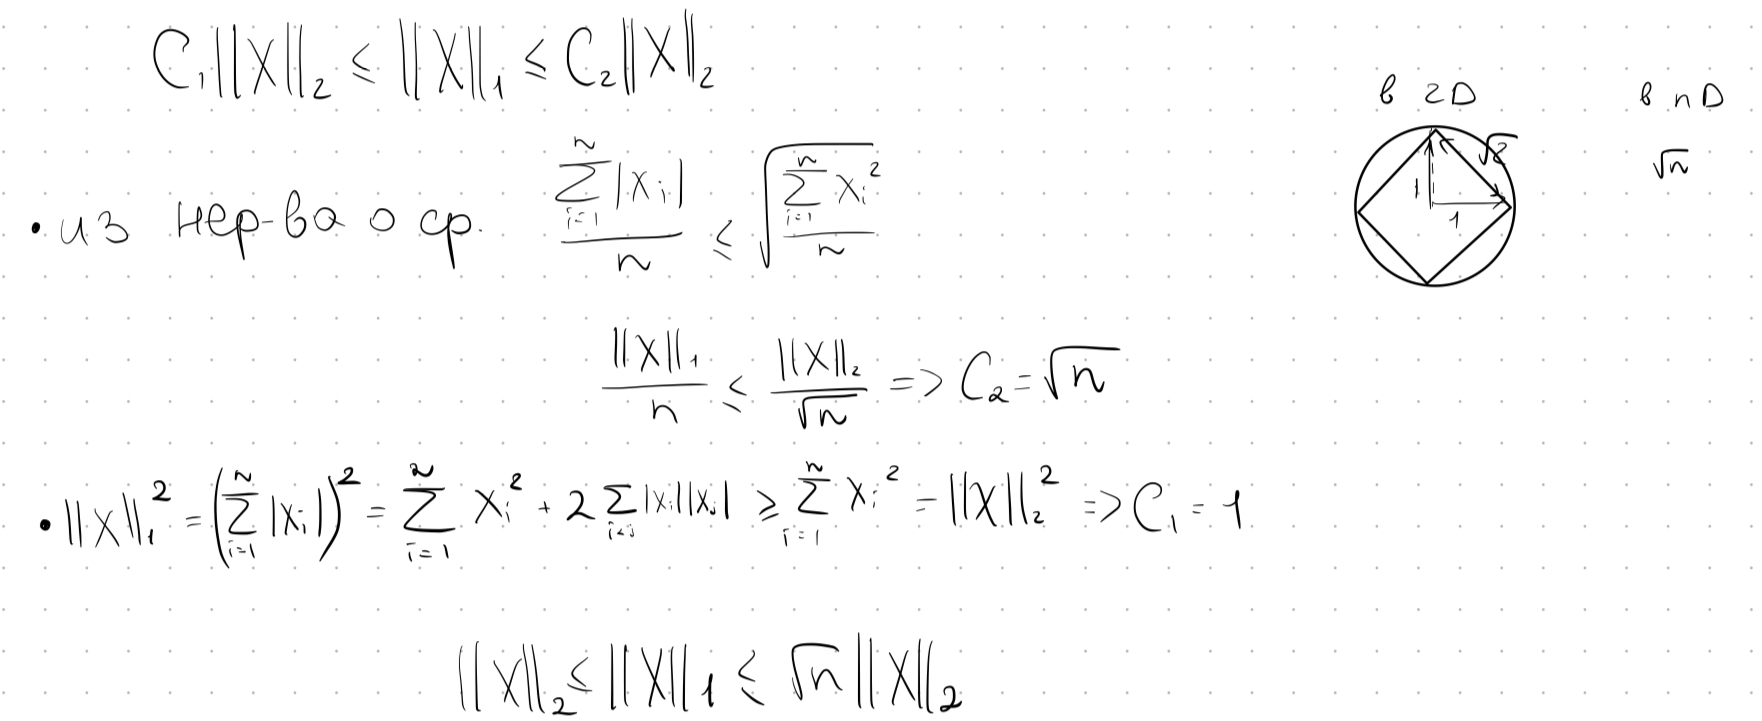

# Задание 4. Евклидова и бесконечная норма

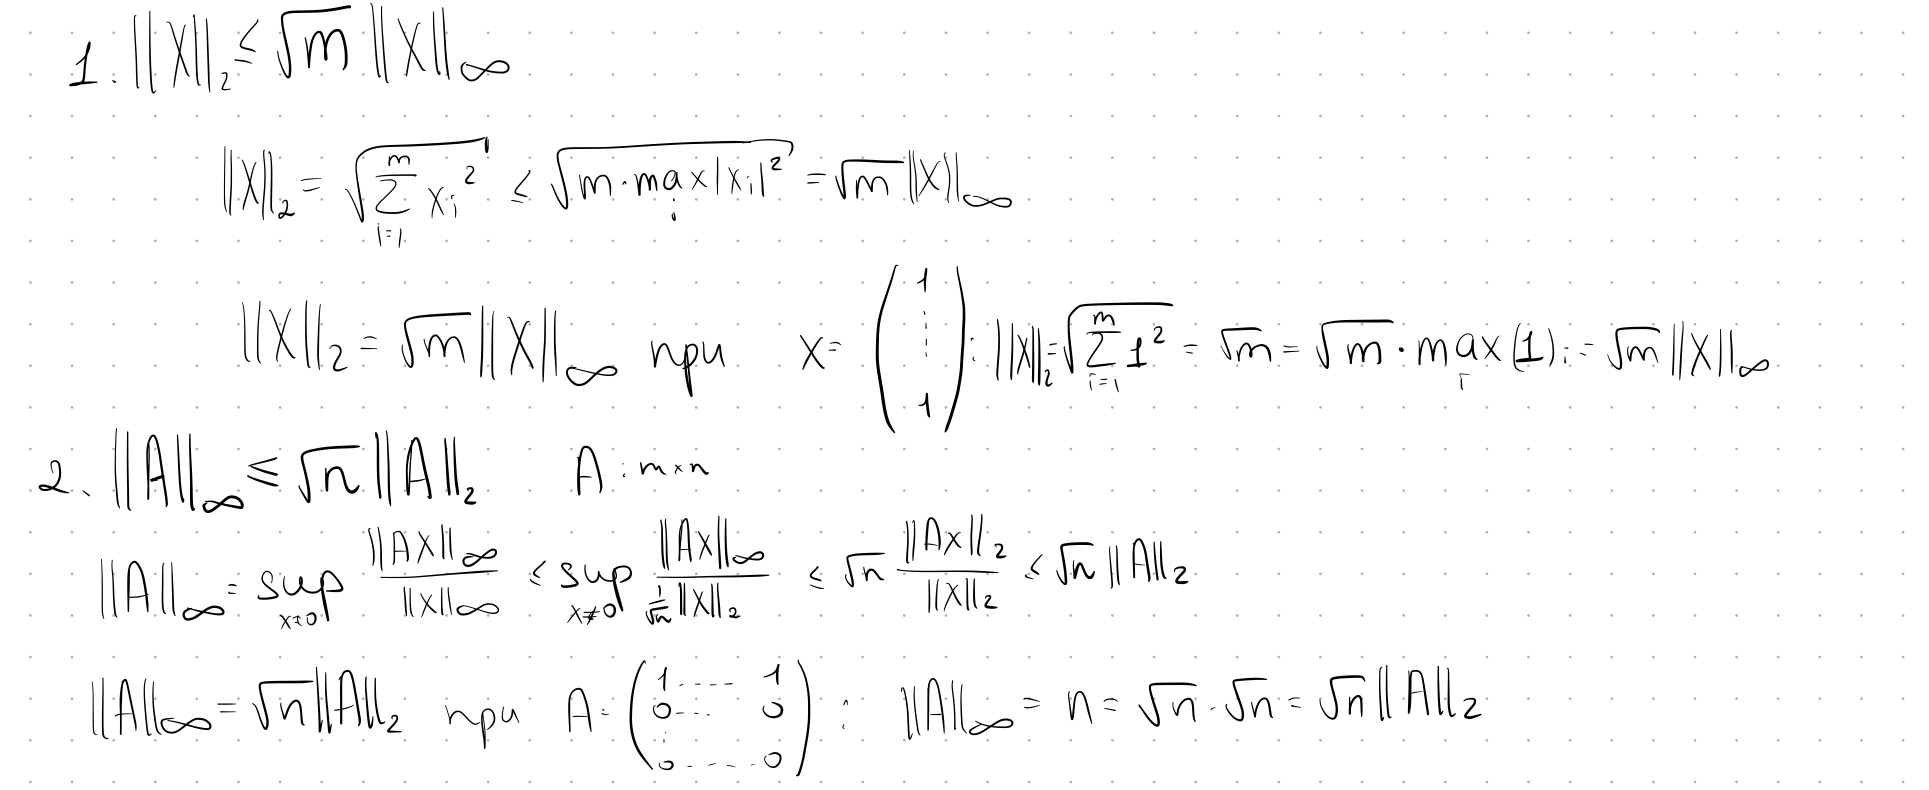

# Задание 5. Норма Фробениуса

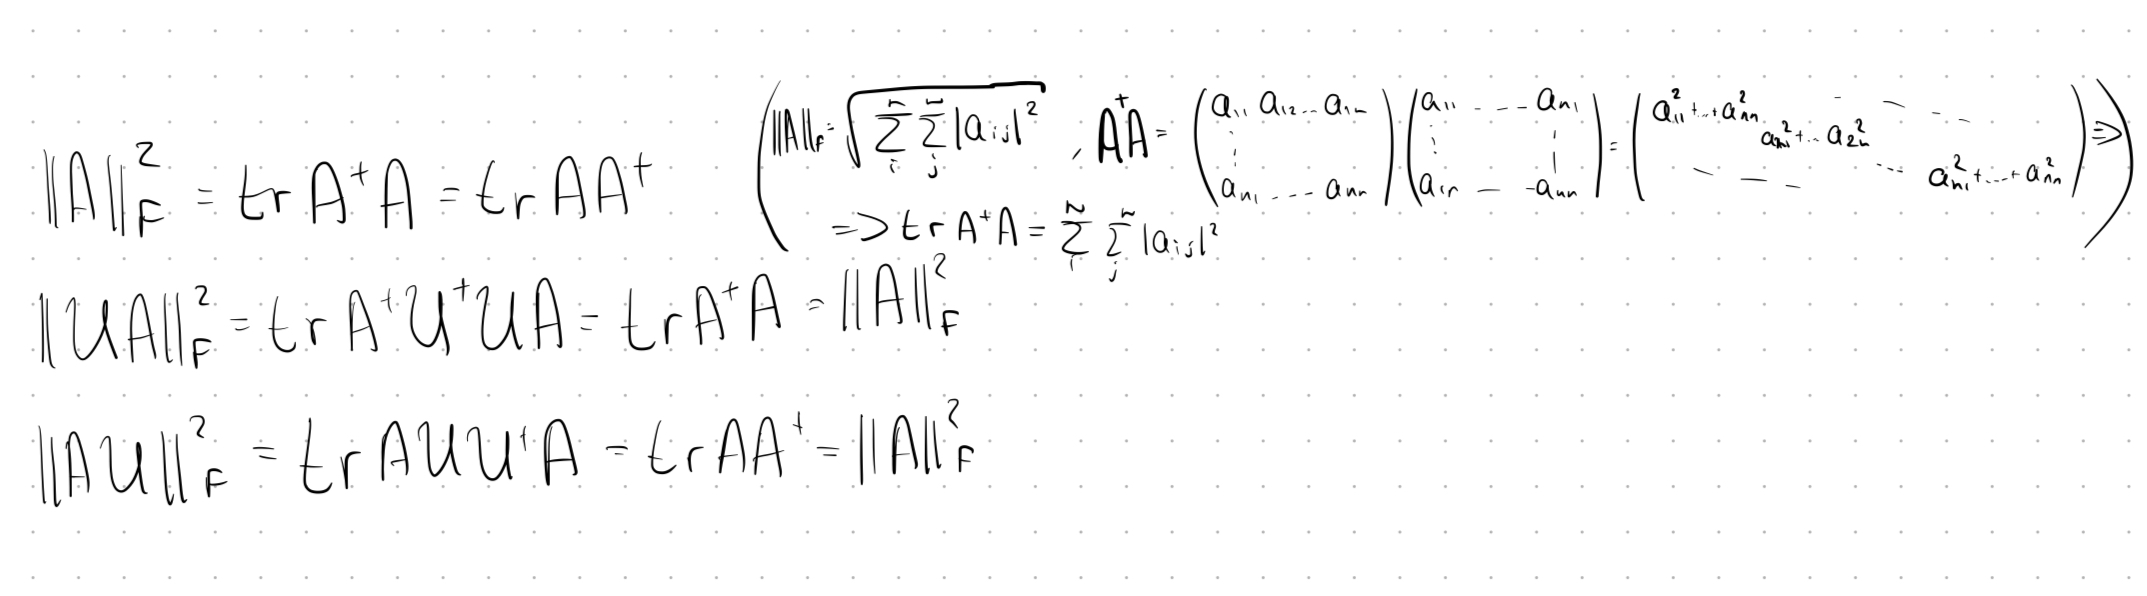
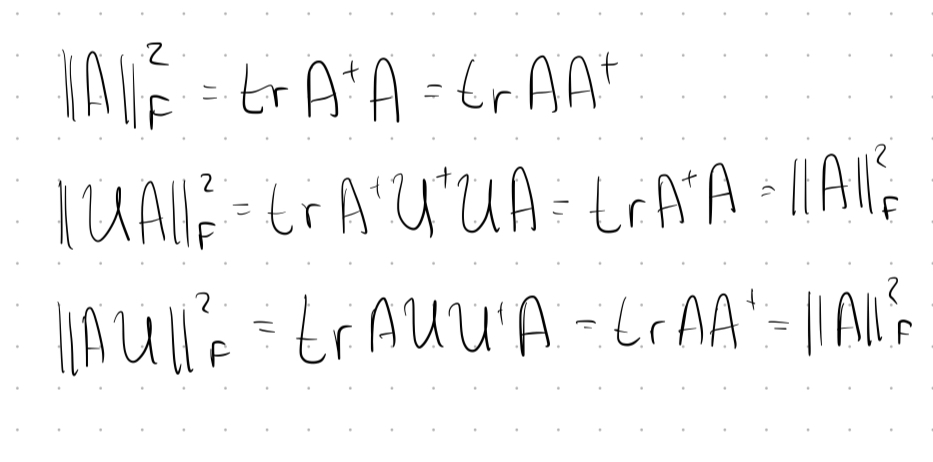